In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import preprocessing
from textblob import TextBlob
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
#import file
hair = pd.read_csv('C:\\Users\\Administrator\\Desktop\\algo\\hair_dryer.tsv',sep='\t')
microwave = pd.read_csv('C:\\Users\\Administrator\\Desktop\\algo\\microwave.tsv',sep='\t')
pacifier = pd.read_csv('C:\\Users\\Administrator\\Desktop\\algo\\pacifier.tsv',sep='\t')
datasates = [pacifier,hair,microwave]

In [111]:
pacifier.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          2
review_date          0
dtype: int64

In [112]:
pacifier = pacifier.fillna('None')

In [113]:
hair.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          0
review_date          0
dtype: int64

In [114]:
hair = hair.fillna('None')

In [115]:
microwave.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [116]:
microwave.duplicated().sum()
pacifier.duplicated().sum()
hair.duplicated().sum()

0

In [117]:
map_vinepurch = {'Y':'Y','y':'Y','N':'N','n':'N'}
hair['vine'] = hair['vine'].map(map_vinepurch)
hair['verified_purchase'] = hair['verified_purchase'].map(map_vinepurch)
microwave['vine'] = microwave['vine'].map(map_vinepurch)
microwave['verified_purchase'] = microwave['verified_purchase'].map(map_vinepurch)
pacifier['vine'] = pacifier['vine'].map(map_vinepurch)
pacifier['verified_purchase'] = pacifier['verified_purchase'].map(map_vinepurch)

In [118]:
pacifier['month'] = 0
pacifier['year'] = 0 
pacifier['month'] = pacifier['review_date'].str.split('/', expand = True)[0]
pacifier['year'] = pacifier['review_date'].str.split('/', expand = True)[2]
hair['month'] = 0
hair['year'] = 0 
hair['month'] = hair['review_date'].str.split('/', expand = True)[0]
hair['year'] = hair['review_date'].str.split('/', expand = True)[2]
microwave['month'] = 0
microwave['year'] = 0 
microwave['month'] = microwave['review_date'].str.split('/', expand = True)[0]
microwave['year'] = microwave['review_date'].str.split('/', expand = True)[2]

In [119]:
microwave['not_votes'] = 0
microwave['not_votes'] = microwave['total_votes'] - microwave['helpful_votes']
hair['not_votes'] = 0
hair['not_votes'] = hair['total_votes'] - hair['helpful_votes']
pacifier['not_votes'] = 0
pacifier['not_votes'] = pacifier['total_votes'] - pacifier['helpful_votes']

## The feeling of the review

In [120]:
hair['realdate'] = 0
microwave['realdate'] = 0
pacifier['realdate'] = 0
for i in hair.index:
    hair['realdate'][i] = datetime.strptime(hair['review_date'][i],'%m/%d/%Y').strftime("%Y/%m")
for i in microwave.index:
    microwave['realdate'][i] = datetime.strptime(microwave['review_date'][i],'%m/%d/%Y').strftime("%Y/%m")
for i in pacifier.index:
    pacifier['realdate'][i] = datetime.strptime(pacifier['review_date'][i],'%m/%d/%Y').strftime("%Y/%m")

## give a score based on the length of the review
### Require Nothing


In [121]:
hair['review_len_score'] = 0
for i in hair.index:
    if len(hair['review_body'][i].split(' ')) > 60:
        hair['review_len_score'][i] = 5
    elif len(hair['review_body'][i].split(' ')) > 39:
        hair['review_len_score'][i] = 4
    elif len(hair['review_body'][i].split(' ')) > 25:
        hair['review_len_score'][i] = 3
    elif len(hair['review_body'][i].split(' ')) > 12:
        hair['review_len_score'][i] = 2
    else:
        hair['review_len_score'][i] = 1
microwave['review_len_score'] = 0
for i in microwave.index:
    if len(microwave['review_body'][i].split(' ')) > 60:
        microwave['review_len_score'][i] = 5
    elif len(microwave['review_body'][i].split(' ')) > 39:
        microwave['review_len_score'][i] = 4
    elif len(microwave['review_body'][i].split(' ')) > 25:
        microwave['review_len_score'][i] = 3
    elif len(microwave['review_body'][i].split(' ')) > 12:
        microwave['review_len_score'][i] = 2
    else:
        microwave['review_len_score'][i] = 1
pacifier['review_len_score'] = 0
for i in pacifier.index:
    if len(pacifier['review_body'][i].split(' ')) > 60:
        pacifier['review_len_score'][i] = 5
    elif len(pacifier['review_body'][i].split(' ')) > 39:
        pacifier['review_len_score'][i] = 4
    elif len(pacifier['review_body'][i].split(' ')) > 25:
        pacifier['review_len_score'][i] = 3
    elif len(pacifier['review_body'][i].split(' ')) > 12:
        pacifier['review_len_score'][i] = 2
    else:
        pacifier['review_len_score'][i] = 1

## Get whether it is negative or happy     Grade     review_filling
### Require Nothing

In [122]:
mapping_mark = {5:4.7484, 4:0.91728, 3:0.35532, 2:-0.93312, 1:-1.836}

In [123]:
hair['happy'] = 0
hair['negative'] = 0
pacifier['happy'] = 0
pacifier['negative'] = 0
microwave['happy'] = 0
microwave['negative'] = 0

In [124]:
review_dict = {}
for i in range(60,101):
    i = i/100
    review_dict[i] = 5
for i in range(20,60):
    i = i/100
    review_dict[i] = 4
for i in range(-20,20):
    i = i/100
    review_dict[i] = 3
for i in range(-60,-20):
    i = i/100
    review_dict[i] = 2
for i in range(-100,-60):
    i = i/100
    review_dict[i] = 1
happy_dict = {}
for i in range(-100,0):
    i = i/100
    happy_dict[i] = 0
happy_dict[0] = 0
for i in range(1,101):
    i = i/100
    happy_dict[i] = 1
negative_dict = {}
for i in range(-100,0):
    i = i/100
    negative_dict[i] = 1
negative_dict[0] = 0
for i in range(1,101):
    i = i/100
    negative_dict[i] = 0

In [125]:
hair['happy'] = 0
hair['negative'] = 0
hair['review_body_feeling'] = hair['review_body']
hair['review_head_feeling'] = hair['review_headline']
for i in hair.index:
    tmp = TextBlob(hair['review_body_feeling'][i])
    hair['review_body_feeling'][i] = tmp.sentiment.polarity
for i in hair.index:
    tmp = TextBlob(hair['review_head_feeling'][i])
    hair['review_head_feeling'][i] = tmp.sentiment.polarity
hair['review_feeling'] = 0.3*hair['review_head_feeling'] + 0.7*hair['review_body_feeling']
hair['review_feeling'] = hair['review_feeling'].astype(float)
hair['review_feeling'] = np.round(hair['review_feeling'],2)
hair['happy'] = hair['review_feeling']
hair['negative'] = hair['review_feeling']
hair['review_feeling'] = hair['review_feeling'].map(review_dict)
hair['happy'] = hair['happy'].map(happy_dict)
hair['negative'] = hair['negative'].map(negative_dict)


hair['grade'] = 0
hair_star_score_map = {-2.396341:-1.222134, -1.627307:-0.2108989872, -0.858274:-0.0282372146,  -0.089240 :-0.005684588,0.679794:0.1793296572}
hair['star_score'] = hair['star_rating']
hair['star_score'] = (hair['star_score']-hair['star_score'].mean())/hair['star_score'].std()
hair['star_score'] = np.round(hair['star_score'],6)
hair['star_score'] = hair['star_score'].map(hair_star_score_map)
hair['review_total'] = hair['review_len_score'] * hair['review_feeling']
hair['review_total'] = (hair['review_total']-hair['review_total'].mean())/hair['review_total'].std()
hair['grade'] = 0.3 * hair['star_score'] + 0.7 * hair['review_total']
hair['grade'] = (hair['grade']-hair['grade'].min())/(hair['grade'].max()-hair['grade'].min())

In [126]:

pacifier['review_body_feeling'] = pacifier['review_body']
pacifier['review_head_feeling'] = pacifier['review_headline']
for i in pacifier.index:
    tmp = TextBlob(pacifier['review_body_feeling'][i])
    pacifier['review_body_feeling'][i] = tmp.sentiment.polarity
for i in pacifier.index:
    tmp = TextBlob(pacifier['review_head_feeling'][i])
    pacifier['review_head_feeling'][i] = tmp.sentiment.polarity
pacifier['review_feeling'] = 0.3*pacifier['review_head_feeling'] + 0.7*pacifier['review_body_feeling']
pacifier['review_feeling'] = pacifier['review_feeling'].astype(float)
pacifier['review_feeling'] = np.round(pacifier['review_feeling'],2)
pacifier['happy'] = pacifier['review_feeling']
pacifier['negative'] = pacifier['review_feeling']
pacifier['review_feeling'] = pacifier['review_feeling'].map(review_dict)
pacifier['happy'] = pacifier['happy'].map(happy_dict)
pacifier['negative'] = pacifier['negative'].map(negative_dict)

pacifier['grade'] = 0
pacifier_star_score_map = {-2.775944:-1.41573144, -1.935909:-0.2508938064, -1.095874:-0.0360542546,  -0.255838 :-0.0162968806, 0.584197:0.1541111686}
pacifier['star_score'] = pacifier['star_rating']
pacifier['star_score'] = (pacifier['star_score']-pacifier['star_score'].mean())/pacifier['star_score'].std()
pacifier['star_score'] = np.round(pacifier['star_score'],6)
pacifier['star_score'] = pacifier['star_score'].map(pacifier_star_score_map)
pacifier['review_total'] = pacifier['review_len_score'] * pacifier['review_feeling']
pacifier['review_total'] = (pacifier['review_total']-pacifier['review_total'].mean())/pacifier['review_total'].std()
pacifier['grade'] = 0.3 * pacifier['star_score'] + 0.7 * pacifier['review_total']
pacifier['grade'] = (pacifier['grade']-pacifier['grade'].min())/(pacifier['grade'].max()-pacifier['grade'].min())

In [127]:

microwave['review_body_feeling'] = microwave['review_body']
microwave['review_head_feeling'] = microwave['review_headline']
for i in microwave.index:
    tmp = TextBlob(microwave['review_body_feeling'][i])
    microwave['review_body_feeling'][i] = tmp.sentiment.polarity
for i in microwave.index:
    tmp = TextBlob(microwave['review_head_feeling'][i])
    microwave['review_head_feeling'][i] = tmp.sentiment.polarity
microwave['review_feeling'] = 0.3*microwave['review_head_feeling'] + 0.7*microwave['review_body_feeling']
microwave['review_feeling'] = microwave['review_feeling'].astype(float)
microwave['review_feeling'] = np.round(microwave['review_feeling'],2)
microwave['happy'] = microwave['review_feeling']
microwave['negative'] = microwave['review_feeling']
microwave['happy'] = microwave['happy'].map(happy_dict)
microwave['negative'] = microwave['negative'].map(negative_dict)
microwave['review_feeling'] = microwave['review_feeling'].map(review_dict)

microwave['grade'] = 0
microwave_star_score_map = {-1.485853:-0.75778503, -0.878038:-0.1137937248, -0.270223:-0.0088903367,  0.337591 :0.021504547, 0.945406:0.2493981028}
microwave['star_score'] = microwave['star_rating']
microwave['star_score'] = (microwave['star_score']-microwave['star_score'].mean())/microwave['star_score'].std()
microwave['star_score'] = np.round(microwave['star_score'],6)
microwave['star_score'] = microwave['star_score'].map(microwave_star_score_map)
microwave['review_total'] = microwave['review_len_score'] * microwave['review_feeling']
microwave['review_total'] = (microwave['review_total']-microwave['review_total'].mean())/microwave['review_total'].std()
microwave['grade'] = 0.3 * microwave['star_score'] + 0.7 * microwave['review_total']
microwave['grade'] = (microwave['grade']-microwave['grade'].min())/(microwave['grade'].max()-microwave['grade'].min())

## Add the sales amount of each good
## Add the score which is the sale + grade in the sales__

In [128]:
#添加物品销量
sales = microwave.groupby(['review_date','product_id']).size()
microwave['sale'] = 0
for i in microwave.index:
    microwave['sale'][i] = sales[microwave['review_date'][i]][microwave['product_id'][i]]
#针对每日，每个物品的数据
sales = microwave.groupby(['review_date','product_id']).mean()
sales_micro = sales.reset_index()

In [129]:
sales = hair.groupby(['review_date','product_id']).size()
hair['sale'] = 0
for i in hair.index:
    hair['sale'][i] = sales[hair['review_date'][i]][hair['product_id'][i]]
sales = hair.groupby(['review_date','product_id']).mean()
sales_hair = sales.reset_index()

In [130]:
sales = pacifier.groupby(['review_date','product_id']).size()
pacifier['sale'] = 0
for i in pacifier.index:
    pacifier['sale'][i] = sales[pacifier['review_date'][i]][pacifier['product_id'][i]]
#full score
sales = pacifier.groupby(['review_date','product_id']).mean()
sales_pacifier = sales.reset_index()

## Get the changing value
### Require grade already

In [131]:
tmp = hair.groupby('product_id')['grade'].mean()
hair_top_score = tmp.sort_values(ascending = False)[:135].mean()
hair_lst_score = tmp.sort_values(ascending = False)[403:].mean()

In [132]:
tmp = microwave.groupby('product_id')['grade'].mean()
microwave_top_score = tmp.sort_values(ascending = False)[:20].mean()
microwave_lst_score = tmp.sort_values(ascending = False)[60:].mean()

In [133]:
tmp = pacifier.groupby('product_id')['grade'].mean()
pacifier_top_score = tmp.sort_values(ascending = False)[:1620].mean()
pacifier_lst_score = tmp.sort_values(ascending = False)[4862:].mean()

In [134]:
hair_mean_score = (hair_top_score + hair_lst_score) / 2
microwave_mean_score = (microwave_top_score + microwave_lst_score) / 2
pacifier_mean_score = (pacifier_top_score + pacifier_lst_score) / 2

In [135]:
tmp = pacifier.groupby('product_id')['grade'].mean()
tmp.sort_values(ascending = False)[1600]

0.6400789785532374

In [136]:
tmp = microwave.groupby('product_id')['grade'].mean()
tmp.sort_values(ascending = False)[20]

0.5556785038784794

In [137]:
tmp = hair.groupby('product_id')['grade'].mean()
tmp.sort_values(ascending = False)[135]

0.6698345503649463

## give a score of each
### Require grade not votes


In [138]:
map_vine = {'Y':5,'N':1}
map_purch = {'Y':1.4,'N':0.6}
vote_dict = {}
for i in range(200,800):
    vote_dict[i] = 3
for i in range(150,200):
    vote_dict[i] = 2.5
for i in range(100,150):
    vote_dict[i] = 2
for i in range(50,100):
    vote_dict[i] = 1.6
for i in range(20,50):
    vote_dict[i] = 1.4
for i in range(1,20):
    vote_dict[i] = 1.2
vote_dict[0] = 1
for i in range(-50,-30):
    vote_dict[i] = 0.5
for i in range(-30,-15):
    vote_dict[i] = 0.7
for i in range(-15,0):
    vote_dict[i] = 0.9

In [139]:
hair['vine_right'] = hair['vine']
hair['verified_purchase_right'] = hair['verified_purchase']
hair['vote'] = hair['helpful_votes'] - hair['not_votes']

In [140]:
microwave['vine_right'] = microwave['vine']
microwave['verified_purchase_right'] = microwave['verified_purchase']
microwave['vote'] = microwave['helpful_votes'] - microwave['not_votes']

In [141]:
pacifier['vine_right'] = pacifier['vine']
pacifier['verified_purchase_right'] = pacifier['verified_purchase']
pacifier['vote'] = pacifier['helpful_votes'] - pacifier['not_votes']

In [142]:
hair['vine_right'] = hair['vine_right'].map(map_vine)
hair['verified_purchase_right'] = hair['verified_purchase_right'].map(map_purch)
hair['vote'] = hair['vote'].map(vote_dict)

In [143]:
microwave['vine_right'] = microwave['vine_right'].map(map_vine)
microwave['verified_purchase_right'] = microwave['verified_purchase_right'].map(map_purch)
microwave['vote'] = microwave['vote'].map(vote_dict)

In [144]:
pacifier['vine_right'] = pacifier['vine_right'].map(map_vine)
pacifier['verified_purchase_right'] = pacifier['verified_purchase_right'].map(map_purch)
pacifier['vote'] = pacifier['vote'].map(vote_dict)

In [145]:
hair['reputation'] = hair['grade'] * hair['vote'] * hair['verified_purchase_right'] * hair['vine_right']


In [146]:
microwave['reputation'] = microwave['grade'] * microwave['vote'] * microwave['verified_purchase_right'] * microwave['vine_right']

In [147]:
pacifier['reputation'] = pacifier['grade'] * pacifier['vote'] * pacifier['verified_purchase_right'] * pacifier['vine_right']

In [148]:
df_full = pd.concat([pacifier,hair,microwave])

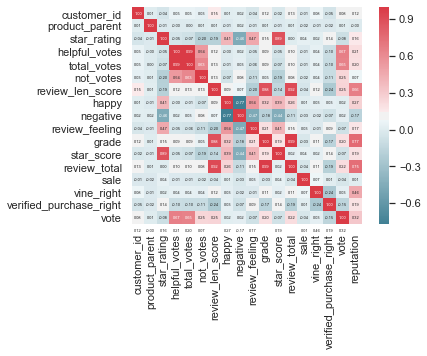

In [298]:
cols = ['star_rating','review_len_score','review_feeling','helpful_votes']
co = df_full.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
ax = sns.heatmap(co, annot=True, square=True, annot_kws={'size': 4}, fmt='.2f',cmap=cmap)
ax.set_ylim([17,0])
plt.savefig('./Qfinal.jpg',dpi=500,bbox_inches = 'tight')

(2, 0)

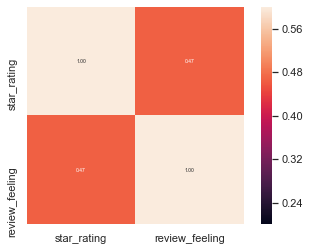

In [150]:
co = df_full[['star_rating','review_feeling']].corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
ax = sns.heatmap(co, annot=True, square=True, annot_kws={'size': 5}, fmt='.2f',vmax=0.60,vmin=0.2)
ax.set_ylim([2,0])

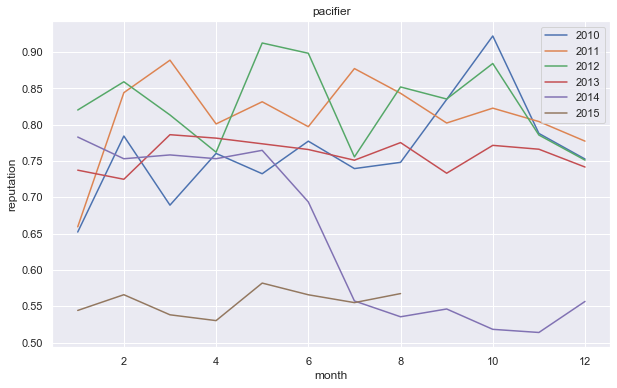

In [151]:
fig = plt.figure(figsize=(10,6))
for i in ['2010','2011','2012','2013','2014','2015']:
    track = pacifier.loc[pacifier['year'] == i].groupby('month')['reputation'].mean()
    track.index = track.index.astype('int64')
    track = track.sort_index()
    sns.lineplot(x = track.index, y= track, label = i)
    plt.title('pacifier')
plt.savefig('./pacifier_rep_change_ana.jpg',dpi=500,bbox_inches = 'tight')

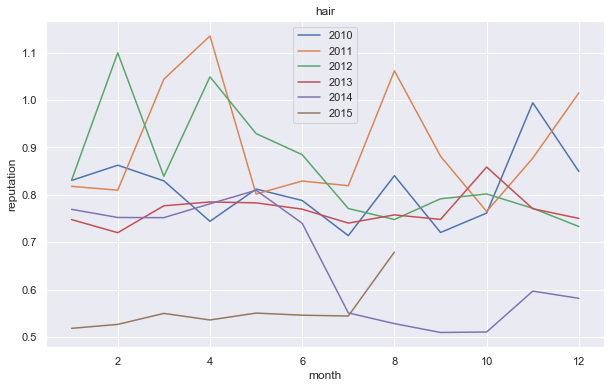

In [152]:
fig = plt.figure(figsize=(10,6))
for i in ['2010','2011','2012','2013','2014','2015']:
    track = hair.loc[hair['year'] == i].groupby('month')['reputation'].mean()
    track.index = track.index.astype('int64')
    track = track.sort_index()
    sns.lineplot(x = track.index, y= track, label = i)
    plt.title('hair')
plt.savefig('./hair_dryer_rep_change_ana.jpg',dpi=500,bbox_inches = 'tight')

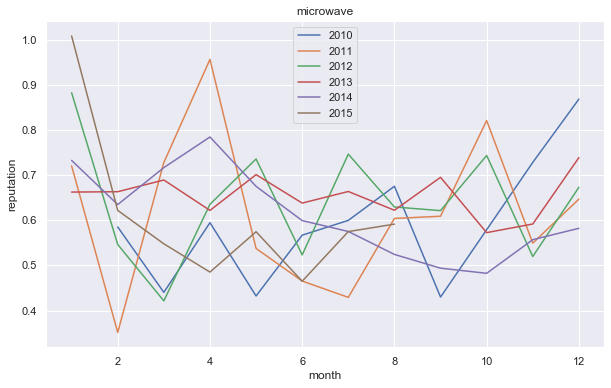

In [153]:
fig = plt.figure(figsize=(10,6))
for i in ['2010','2011','2012','2013','2014','2015']:
    track = microwave.loc[microwave['year'] == i].groupby('month')['reputation'].mean()
    track.index = track.index.astype('int64')
    track = track.sort_index()
    sns.lineplot(x = track.index, y= track, label = i)
    plt.title('microwave')
plt.savefig('./microwave_rep_change_ana.jpg',dpi=500,bbox_inches = 'tight')

In [154]:
star_dict = {5:1,4:0,3:0,2:0,1:0}
hair['five_star'] = hair['star_rating'].map(star_dict)
pacifier['five_star'] = pacifier['star_rating'].map(star_dict)
microwave['five_star'] = microwave['star_rating'].map(star_dict)

In [155]:
star_dict = {5:0,4:0,3:0,2:0,1:1}
hair['one_star'] = hair['star_rating'].map(star_dict)
pacifier['one_star'] = pacifier['star_rating'].map(star_dict)
microwave['one_star'] = microwave['star_rating'].map(star_dict)

In [301]:
best_in_pacifier = pacifier.groupby(['product_id','realdate']).mean().loc[['B003CK3LDI']]
best_in_pacifier = best_in_pacifier.reset_index().groupby('realdate').mean()
#five6
#3
#one7
#0

In [157]:
best_in_pacifier1 = pacifier.groupby(['product_id','realdate']).mean().loc[['B0028IDXDS']]
best_in_pacifier1 = best_in_pacifier1.reset_index().groupby('realdate').mean()
#8
#2
#one2
#0

In [299]:
best_in_pacifier2 = pacifier.groupby(['product_id','realdate']).mean().loc[['B0045I6IA4']]
best_in_pacifier2 = best_in_pacifier2.reset_index().groupby('realdate').mean()
#7 
#1
#one8
#one1

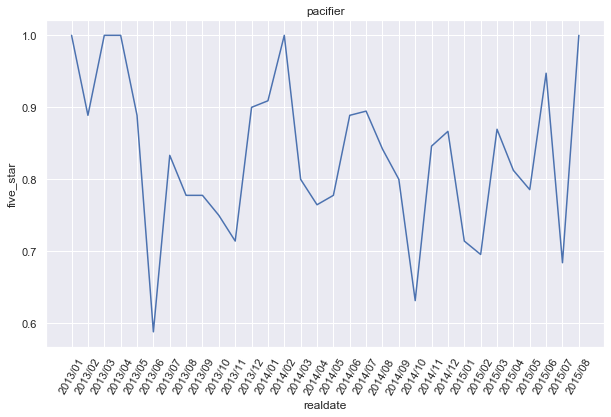

In [302]:
fig = plt.figure(figsize=(10,6))
track = best_in_pacifier['five_star'][-32:]
sns.lineplot(x = track.index, y= track )

plt.xticks(rotation = 60)
plt.title('pacifier')
plt.savefig('./test100.jpg',dpi=500,bbox_inches = 'tight')

In [160]:
best_in_hair = hair.groupby(['product_id','realdate']).mean().loc[['B00132ZG3U']]
best_in_hair = best_in_hair.reset_index().groupby('realdate').mean()
#9 
#4
#one8
#1

In [161]:
best_in_hair1 = hair.groupby(['product_id','realdate']).mean().loc[['B003V264WW']]
best_in_hair1 = best_in_hair1.reset_index().groupby('realdate').mean()
#5 
#0
#one10
#1

In [162]:
best_in_hair2 = hair.groupby(['product_id','realdate']).mean().loc[['B0009XH6TG']]
best_in_hair2 = best_in_hair2.reset_index().groupby('realdate').mean()
#6
#3
#one7
#0

In [163]:
best_in_hair3 = hair.groupby(['product_id','realdate']).mean().loc[['B00005O0MZ']]
best_in_hair3 = best_in_hair3.reset_index().groupby('realdate').mean()
#9
#1
#one8
#1

In [164]:
best_in_hair = hair.groupby(['product_id','realdate']).mean().loc[['B000R80ZTQ']]
best_in_hair = best_in_hair.reset_index().groupby('realdate').mean()
#6
#4
#one3
#2

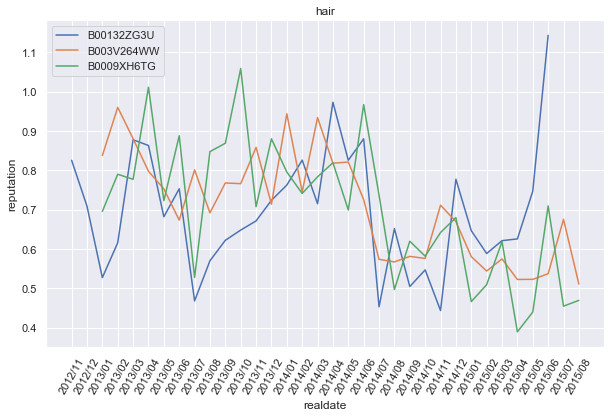

In [165]:
fig = plt.figure(figsize=(10,6))
track = best_in_hair['five'][-32:]
sns.lineplot(x = track.index, y= track)

plt.xticks(rotation = 60)
plt.title('hair')
plt.savefig('./test6.jpg',dpi=500,bbox_inches = 'tight')

In [166]:
hair['product_id'].value_counts()[:10]

B003V264WW    587
B0009XH6TG    555
B00132ZG3U    535
B00005O0MZ    424
B000R80ZTQ    321
B000A3I2X4    297
B001UE7D2I    260
B001QTW2FK    253
B0009XH6WI    238
B0009XH6V4    207
Name: product_id, dtype: int64

In [167]:
best_in_microwave = microwave.groupby(['product_id','realdate']).mean().loc[['B0052G14E8']]
best_in_microwave = best_in_microwave.reset_index().groupby('realdate').mean()
#4
#0

In [168]:
best_in_microwave = microwave.groupby(['product_id','realdate']).mean().loc[['B0055UBB4O']]
best_in_microwave = best_in_microwave.reset_index().groupby('realdate').mean()
#5
#1

In [169]:
best_in_microwave = microwave.groupby(['product_id','realdate']).mean().loc[['B0058CLNBU']]
best_in_microwave = best_in_microwave.reset_index().groupby('realdate').mean()
#

Text(0.5, 1.0, 'microwave')

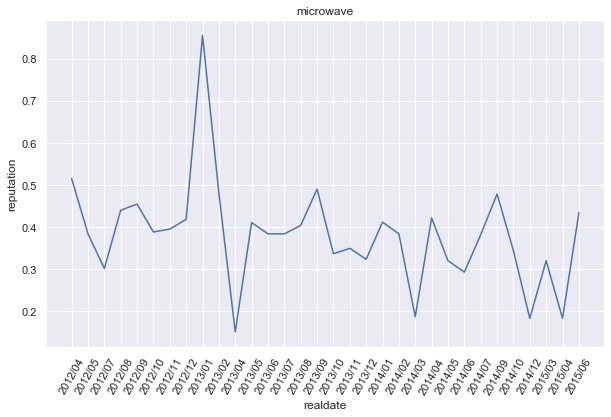

In [170]:
fig = plt.figure(figsize=(10,6))
track = best_in_microwave['reputation'][-32:]
sns.lineplot(x = track.index, y= track)
plt.xticks(rotation = 60)
plt.title('microwave')

In [172]:
track_star = df_full['star_rating'].value_counts()/42024
track_star.index  = track_star.index.astype('int64')
track_star.sort_index()

1    0.062488
2    0.040358
3    0.060894
4    0.121645
5    0.476656
Name: star_rating, dtype: float64

In [173]:
track_review = df_full['review_feeling'].value_counts()/42024
track_review.index  = track_review.index.astype('int64')
track_review.sort_index()

1    0.001261
2    0.017085
3    0.263944
4    0.407125
5    0.072625
Name: review_feeling, dtype: float64

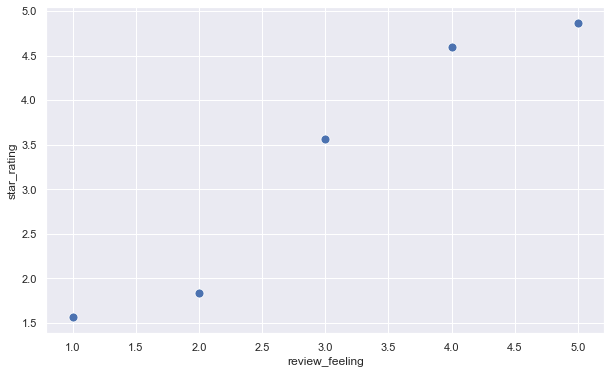

<Figure size 432x288 with 0 Axes>

In [286]:
fig = plt.figure(figsize=(10,6))
track = df_full.groupby('review_feeling').mean()['star_rating']
sns.scatterplot(x = track.index, y =track,s=80)
plt.show()
plt.savefig('Q100.jpg',dpi=500,bbox_inches = 'tight')

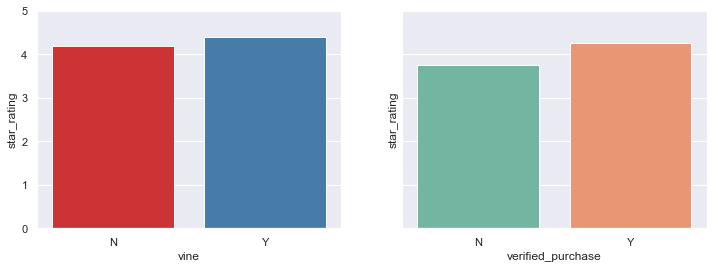

In [176]:
fig, ax = plt.subplots(1, 2, figsize=(12,4 ),sharey=True)

track = df_full.groupby('vine')['star_rating'].mean()
sns.barplot(x = track.index,y=track,palette='Set1',ax=ax[0])
track = df_full.groupby('verified_purchase')['star_rating'].mean()
sns.barplot(x = track.index,y=track,palette='Set2',ax = ax[1])
plt.ylim((0,5))
plt.savefig('./Vine_purch.jpg',dpi=500,bbox_inches = 'tight')

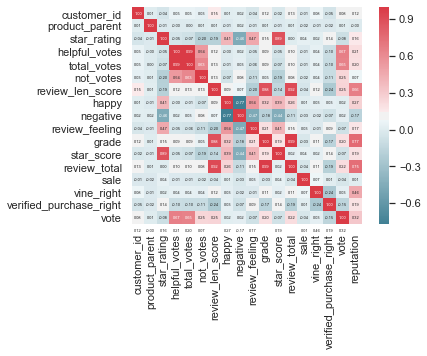

In [305]:
columns = ['star_rating','review_len_score','review_feeling','helpful_votes']
co = df_full.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
ax = sns.heatmap(co, annot=True, square=True, annot_kws={'size': 4}, fmt='.2f',cmap=cmap)
ax.set_ylim([17,0])
plt.savefig('./Q1.jpg',dpi=500,bbox_inches = 'tight')

In [303]:
df_full['vine']

0       N
1       N
2       N
3       N
4       N
       ..
1610    N
1611    N
1612    N
1613    N
1614    N
Name: vine, Length: 32024, dtype: object

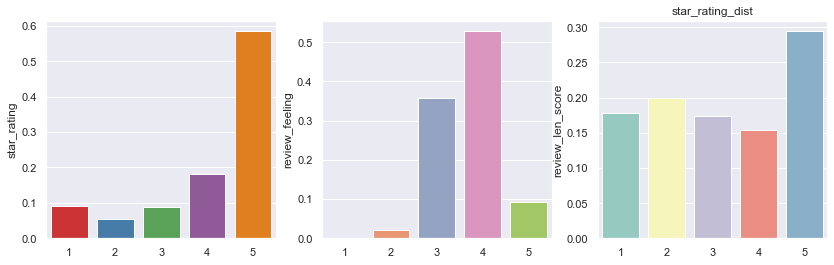

In [178]:
fig, ax = plt.subplots(1, 3, figsize=(14,4 ))
track = hair['star_rating'].value_counts()/11470
sns.barplot(x = track.index, y=track, ax = ax[0], palette='Set1')
plt.title('star_rating_dist')
track = hair['review_feeling'].value_counts()/11470
sns.barplot(x = track.index, y=track, ax = ax[1], palette='Set2')
plt.title('review_feeling_dist')
track = hair['review_len_score'].value_counts()/11470
sns.barplot(x = track.index, y=track, ax = ax[2], palette='Set3')
plt.title('star_rating_dist')
plt.savefig('./hairdst2.jpg',dpi=500,bbox_inches = 'tight')

In [179]:
hair['review_feeling'].value_counts().sum()

11470

In [180]:
sale_full = df_full.groupby(['review_date','product_id']).mean()[['star_rating','review_feeling','review_len_score','sale']]
sale_full =sale_full.reset_index()

In [183]:
sale_full['realdate'] = 0
for i in sale_full.index:
    sale_full['realdate'][i] = datetime.strptime(sale_full['review_date'][i],'%m/%d/%Y').strftime("%Y/%m")

In [184]:
sale_full.drop(['review_date'], axis = 1,inplace= True)

In [185]:
sale_full_sub2 = sale_full.groupby(['realdate'])['sale'].sum()
sale_full_sub = sale_full.groupby(['realdate'])['star_rating','review_feeling','review_len_score'].mean()
sale_full_sub['sales'] = 0
for i in sale_full_sub2.index:
    sale_full_sub['sales'][i] = sale_full_sub2[i]

In [186]:
final_sale = sale_full_sub[-56:]
final_sale.to_csv('final_sale1.csv')

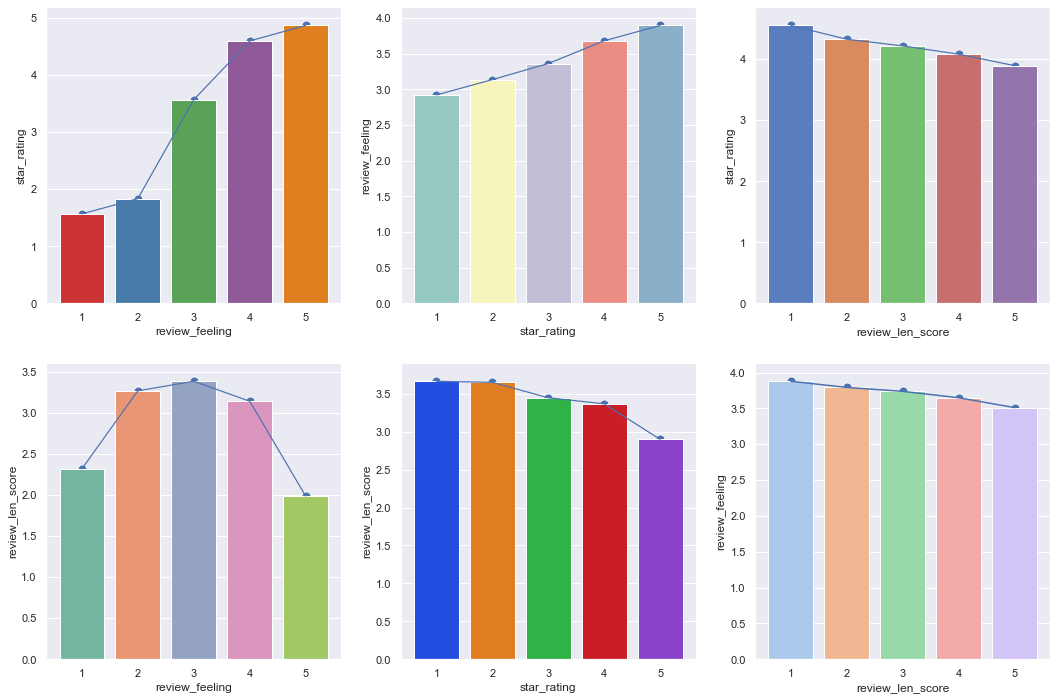

In [188]:
fig, ax = plt.subplots(2, 3, figsize=(18,12 ))

track = df_full.groupby(['review_feeling']).mean()['star_rating']
sns.barplot(x = track.index,y=track,ax=ax[0,0],palette='Set1')
sns.lineplot(x = track.index-1,y=track,ax=ax[0,0],linewidth = 1.2)
sns.scatterplot(x = track.index-1,y=track,ax=ax[0,0],s=80)
track = df_full.groupby(['review_feeling']).mean()['review_len_score']
sns.barplot(x = track.index,y=track,ax=ax[1,0],palette='Set2')
sns.lineplot(x = track.index-1,y=track,ax=ax[1,0],linewidth = 1.2)
sns.scatterplot(x = track.index-1,y=track,ax=ax[1,0],s=80)
track = df_full.groupby(['star_rating']).mean()['review_feeling']
sns.barplot(x = track.index,y=track,ax=ax[0,1],palette='Set3')
sns.lineplot(x = track.index-1,y=track,ax=ax[0,1],linewidth = 1.2)
sns.scatterplot(x = track.index-1,y=track,ax=ax[0,1],s=80)
track = df_full.groupby(['star_rating']).mean()['review_len_score']
sns.barplot(x = track.index,y=track,ax=ax[1,1],palette='bright')
sns.lineplot(x = track.index-1,y=track,ax=ax[1,1],linewidth = 1.2)
sns.scatterplot(x = track.index-1,y=track,ax=ax[1,1],s=80)
track = df_full.groupby(['review_len_score']).mean()['star_rating']
sns.barplot(x = track.index,y=track,ax=ax[0,2],palette='muted')
sns.lineplot(x = track.index-1,y=track,ax=ax[0,2],linewidth = 1.2)
sns.scatterplot(x = track.index-1,y=track,ax=ax[0,2],s=80)
track = df_full.groupby(['review_len_score']).mean()['review_feeling']
sns.barplot(x = track.index,y=track,ax=ax[1,2],palette='pastel')
sns.lineplot(x = track.index-1,y=track,ax=ax[1,2])
sns.scatterplot(x = track.index-1,y=track,ax=ax[1,2],s=80)
plt.savefig('./test5.jpg',dpi=500,bbox_inches = 'tight')

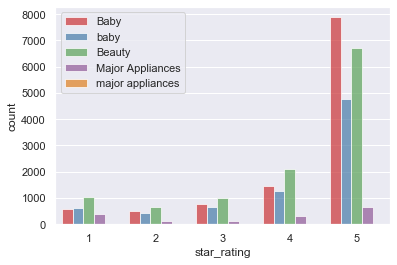

In [196]:
sns.countplot(x='star_rating', data=df_full, hue='product_category', palette='Set1', alpha=0.7)
plt.legend()

In [212]:
sales = microwave.groupby(['realdate','product_id']).size()

In [213]:
microwave['sale'] = 0
for i in microwave.index:
    microwave['sale'][i] = sales[microwave['realdate'][i]][microwave['product_id'][i]]

In [214]:
sales = microwave.groupby(['review_date','product_id']).size()
microwave['sale'] = 0
for i in microwave.index:
    microwave['sale'][i] = sales[microwave['review_date'][i]][microwave['product_id'][i]]

In [218]:
#添加物品销量
sales = microwave.groupby(['realdate','product_id']).size()
microwave['sale'] = 0
for i in microwave.index:
    microwave['sale'][i] = sales[microwave['realdate'][i]][microwave['product_id'][i]]

In [219]:
#添加物品销量
sales = hair.groupby(['realdate','product_id']).size()
hair['sale'] = 0
for i in hair.index:
    hair['sale'][i] = sales[hair['realdate'][i]][hair['product_id'][i]]

In [220]:
#添加物品销量
sales = pacifier.groupby(['realdate','product_id']).size()
pacifier['sale'] = 0
for i in pacifier.index:
    pacifier['sale'][i] = sales[pacifier['realdate'][i]][pacifier['product_id'][i]]

In [259]:
micro_mode = microwave.groupby(['realdate','product_id']).mean()[['review_len_score','review_feeling','star_rating','sale']].reset_index()
hair_mode = hair.groupby(['realdate','product_id']).mean()[['review_len_score','review_feeling','star_rating','sale']].reset_index()
pacifier_mode = pacifier.groupby(['realdate','product_id']).mean()[['review_len_score','review_feeling','star_rating','sale']].reset_index()

In [252]:
model_file = pd.concat([hair_mode,micro_mode,pacifier_mode])

In [253]:
model_file.to_csv('r_model_lr2.csv')

In [265]:
micro_mode_sale = micro_mode.groupby('realdate')['sale'].sum()
micro_mode_grade = micro_mode.groupby('realdate').mean()[['review_len_score','review_feeling','star_rating']]
micro_mode_grade['sales'] = 0
for i in micro_mode_grade.index:
    micro_mode_grade['sales'][i] = micro_mode_sale[i]

In [272]:
hair_mode_sale = hair_mode.groupby('realdate')['sale'].sum()
hair_mode_grade = hair_mode.groupby('realdate').mean()[['review_len_score','review_feeling','star_rating']]
hair_mode_grade['sales'] = 0
for i in hair_mode_grade.index:
    hair_mode_grade['sales'][i] = hair_mode_sale[i]


In [271]:
pacifier_mode_sale = pacifier_mode.groupby('realdate')['sale'].sum()
pacifier_mode_grade = pacifier_mode.groupby('realdate').mean()[['review_len_score','review_feeling','star_rating']]
pacifier_mode_grade['sales'] = 0
for i in pacifier_mode_grade.index:
    pacifier_mode_grade['sales'][i] = pacifier_mode_sale[i]


In [277]:
hair_mode_grade = hair_mode_grade[-56:]
pacifier_mode_grade = pacifier_mode_grade[-56:]
micro_mode_grade = micro_mode_grade[-56:]

In [278]:
pacifier_mode_grade.to_csv('pacifier_mod.csv')
hair_mode_grade.to_csv('hair_mod.csv')
micro_mode_grade.to_csv('micro_mod.csv')